#### Import des librairies

In [59]:
import kaggle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Import des données

In [ ]:
df_Store = pd.read_csv('./data/store.csv', low_memory=False)
df_Test = pd.read_csv('./data/test.csv', low_memory=False)
df_Train = pd.read_csv('./data/train.csv', low_memory=False)

#### Description des données

In [14]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Description des données numériques

In [29]:
df_Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [30]:
df_Store.describe(include='object')

,StoreType,Assortment,PromoInterval
count,1115,1115,571
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,335


<function matplotlib.pyplot.show(close=None, block=None)>

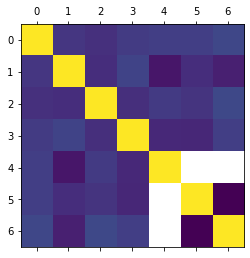

In [23]:
corr_store = df_Store.corr()
plt.matshow(corr_store)
plt.show

On remarque que la matrice est peu lisible avec seulement un plot classique, on va plutôt utiliser le package seaborn

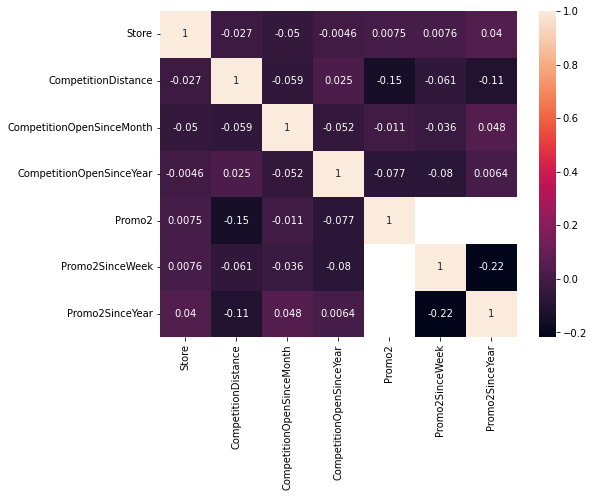

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_store, annot=True)
plt.show()

Aucun couple de données ne semble être suffisamment corrélés pour être redondant. On pourra donc à l'avenir considérer qu'on garde tout le dataset.

#### Tentatives d'analyse de données

Il est peut-être possible de regrouper les données décrivant les promotions, on va tenter de le faire grâce à une ACP

On commence par adapter les données en question

In [68]:
df_Store_PCA = df_Store.select_dtypes(['number'])
col = ['scaled'+i for i in df_Store_PCA.columns]
df_Store_PCA = df_Store_PCA.fillna(0)
df_Store_PCA = StandardScaler().fit_transform(df_Store_PCA)
df_Store_PCA = pd.DataFrame(data = df_Store_PCA, columns = col)
df_Store_PCA.head()

,scaledStore,scaledCompetitionDistance,scaledCompetitionOpenSinceMonth,scaledCompetitionOpenSinceYear,scaledPromo2,scaledPromo2SinceWeek,scaledPromo2SinceYear
0,-1.730498,-0.538290,0.950048,0.681314,-1.024516,-0.777805,-1.024515
1,-1.727391,-0.629739,1.417010,0.680244,0.976071,0.059001,0.974317
2,-1.724284,1.141759,1.650491,0.679175,0.976071,0.123370,0.975311
3,-1.721178,-0.623207,0.950048,0.682383,-1.024516,-0.777805,-1.024515
4,-1.718071,3.203281,-0.217357,0.688800,-1.024516,-0.777805,-1.024515


In [87]:
pca = PCA()
PCA_Store = pca.fit_transform(df_Store_PCA)
PCA_Store_df = pd.DataFrame(data = PCA_Store, columns = ['principal component '+ str(i) for i in range(1,8)])
PCA_Store_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-1.795388,-0.859779,1.175857,-1.402064,-0.155332,-0.142169,-0.000027
1,0.876553,-1.825212,1.348177,-1.103181,0.639557,-0.461760,-0.001470
2,0.645561,-1.818017,2.158051,0.458373,0.579854,-0.675189,-0.000665
3,-1.784465,-0.868585,1.128870,-1.471965,-0.155327,-0.139322,-0.000032
4,-2.099089,0.306539,2.858912,1.845424,-0.127304,0.585999,0.000195


In [90]:
pca.explained_variance_ratio_

array([3.96060347e-01, 2.48097098e-01, 1.44752955e-01, 1.35595742e-01,
       4.49391096e-02, 3.05546520e-02, 9.57242151e-08])